
# 项目：探索IMDB数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#import">数据导入</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 对IMDB的数据集进行一定的处理，并跟据数据的特点进行整理、计算，通过可视化表格对数据将分析结果呈现出来，从而得出分析结论。



## 数据导入

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
movie_data = pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## 数据整理

> 对数据进行清理，保留有价值可分析的数据信息。

### 查看数据

> 可以使用使用 .head()、.tail()、.sample() 方法，观察、了解数据表的情况。

>使用 .dtypes 属性，来查看各列数据的数据类型。

>使用 isnull()，来查看各列是否存在空值。

>使用 .describe() 方法，看看数据表中数值型的数据是怎么分布的。


In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。

movie_data.info()
movie_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> 我们需要对无用的列和缺失数据的列进行删除


### 数据清理

In [3]:
#删除轻微缺失的行：‘imdb_id’，‘cast’，‘director’，‘overview’，‘genres’,
# 'homepage','tagline','keywords','production_companies'
movie_data = movie_data.drop(columns = ['homepage','tagline','keywords','production_companies'])
movie_data.dropna(axis = 0, inplace = True)

In [4]:
# 查看重复行
movie_data[movie_data.duplicated()==True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
# 删除重复行
movie_data.drop_duplicates(inplace=True)

In [6]:
# 查看数据信息
movie_data.shape[0]

10724

In [7]:
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10724.000000,10724.000000,1.072400e+04,1.072400e+04,10724.000000,10724.000000,10724.000000,10724.000000,1.072400e+04,1.072400e+04
mean,65184.471559,0.652858,1.481331e+07,4.034621e+07,102.503450,219.943305,5.964407,2001.254196,1.777690e+07,5.204018e+07
std,91474.417621,1.005072,3.107239e+07,1.176863e+08,30.460109,578.981655,0.930163,12.822467,3.447456e+07,1.454665e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10545.750000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20307.500000,0.387247,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73937.500000,0.721577,1.600000e+07,2.500980e+07,112.000000,148.250000,6.600000,2011.000000,2.113258e+07,3.476953e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## 探索性数据分析

> 首先通过一些操作，查看数据集的一些特殊情况；再通过绘制图表观察数据之间的关系

### 简单数据提取

>我们观察数据集，发现一些逻辑上有问题的数据，比方说预算和收入为零的电影，由于数据信息的局限我们无法通过数据得到为什么为零的原因，我们仅通过调取他们试图推测这其中大的原因。我们通过groupby（）函数将零预算和零收入的数据放到一起进行查看，

In [9]:
# 提取预算为0的电影
zero_budget_and_revenue_movies = movie_data.groupby(['budget','revenue']).get_group((0,0))
zero_budget_and_revenue_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,Greg is coasting through senior year of high s...,105,Comedy|Drama,6/12/15,569,7.7,2015,0.0,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015,0.0,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,3/9/15,475,7.0,2015,0.0,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,9/26/15,161,5.4,2015,0.0,0.0


### 逻辑读取

> 我认为一部电影的利润从某称程度上代表着其经济价值，所以我们通过计算来获取利润和调整利润的数据，用以确认哪些电影给制片方带来了不错的收益。需要说明的是这是一个总量指标，并不是一个比率指标，有的电影可以通过大制作获得巨大的收入，但是他从投资回报率的角度可能不及那些小成本高收益的电影。但是，高票房高收益的电影往往市场的影响力比较大。我们用同一行数据调取特定列并进行加减预算获得我们想要的数据。

>一些商业片导演往往可以通过高投入高收益的方式获得市场的认可，但一部好的影片唯一正确的评价应该是他的口碑，能够持续生产高口碑的电影也就成了评价一个优秀导演的客观标准，所以我们通过计算导演所拍摄的电影的平均好评找寻那些好的导演。我们用mean（）函数获取导演拍摄电影的平均数据，再用sort_values()函数对导演进行排序。

In [10]:
# 通过收入减预算测算电影的利润
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']
profitable_movies = movie_data[movie_data['profit']>=0]
non_profitable_movies = movie_data[movie_data['profit']<0]
profitable_movies.sort_values('profit',ascending=False).head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,1299557910
3374,12445,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09,1202817822
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,1125035767
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09,1124219009
8094,1642,tt0113957,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Angela Bennett is a freelance software enginee...,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09,1084279658


In [11]:
# 对director进行分组，并按照平均受欢迎程度进行排序
movie_data.groupby(movie_data['director'])['popularity'].mean().sort_values(ascending=False).head()

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Name: popularity, dtype: float64

### 尝试读取数据

>这部分操作并没有实际的数据分析意义，只是用一些方法查看数据集的一些局部特征。使用loc（）函数对数据进行切片。

In [12]:
# 读取1-10行和23行数据
movie_data.loc[list(range(10))+[23]]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,678708609


In [13]:
# 读取director的第20-30行数据
movie_data.loc[19:29,'director']

19         Francis Lawrence
20                Brad Bird
21            Antoine Fuqua
22              Brad Peyton
23       Sam Taylor-Johnson
24               Adam McKay
25    Christopher McQuarrie
26          Seth MacFarlane
27           Matthew Vaughn
28             Tom McCarthy
29                 Wes Ball
Name: director, dtype: object

## 可视化

### 条形图排序

>票房高的电影往往会带来社会的巨大反响，我们通过绘制条形图将收入最高的20部电影挑选出来，直观的查看他们票房的规模及彼此的差异。

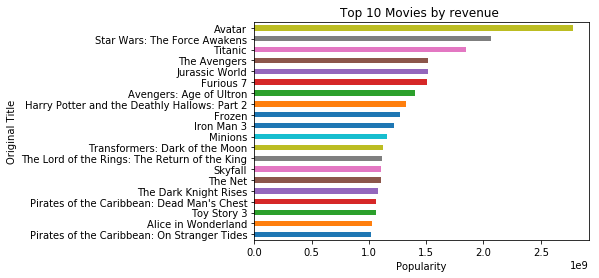

In [14]:
# 对收入最高的前10部电影绘制条形图
movie_data.set_index('original_title')['revenue'].sort_values()[-20:].plot(kind='barh')
plt.xlabel('Popularity')
plt.ylabel('Original Title')
plt.title('Top 10 Movies by revenue ');

>通过条形图我们发现阿凡达在票房上获得了巨大的成功，相较第二名星球大战高出近三分之一的票房。

>前三名的影片表现出明显的梯度差异，而第四到第十的电影，票房之间的差异逐渐缩小。

>第十名以后电影票房差异小于1亿美金。

### 折线图

>通过绘制折线图我们尝试寻找一些趋势性的变化，就像预测行业周期一样，我们试图找寻整个行业发展规律，这里仅从各年的平均利润及发行量来寻找一些规律。

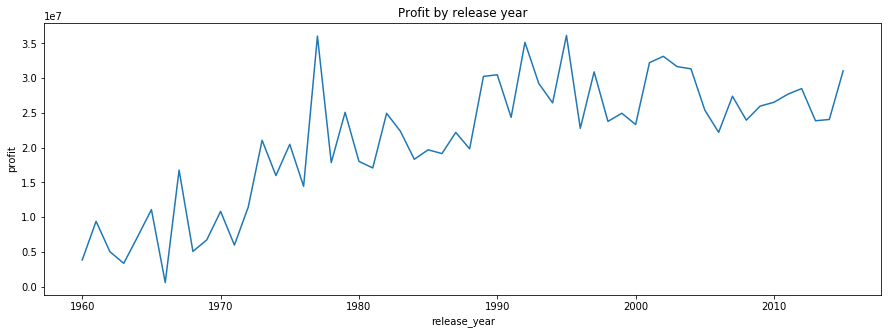

In [15]:
#利润折现图
movie_data.groupby('release_year')['profit'].mean().plot(kind='line', figsize=(15, 5));
plt.xlabel('release_year')
plt.ylabel('profit')
plt.title('Profit by release year');

>通过图表发现每年的平均利润整体呈现上涨的发展趋势。

>在整个增长的趋势中，各年的波动比较大，基本上每年都会出现一个反转行情。

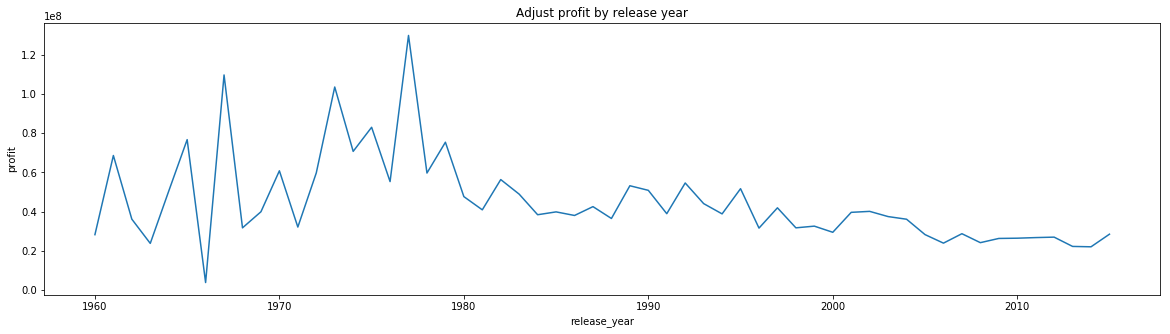

In [16]:
# 调整利润折现图
movie_data['profit_adj'] = movie_data['revenue_adj'] - movie_data['budget_adj']
movie_data.groupby('release_year')['profit_adj'].mean().plot(kind='line', figsize=(20, 5));
plt.xlabel('release_year')
plt.ylabel('profit_adj')
plt.title('Adjust profit by release year');

>虽然并不知道这里的调整利润中，是对那些因素进行了修正，但图像中展现出来的情况明显与未调整的利润不同。

>调整利润趋势整体平缓，并没有像非调整利润那样有明显的上涨趋势。

>调整利润的波动方向与非调整利润的图像一致，并表现出了逐年收窄的趋势。

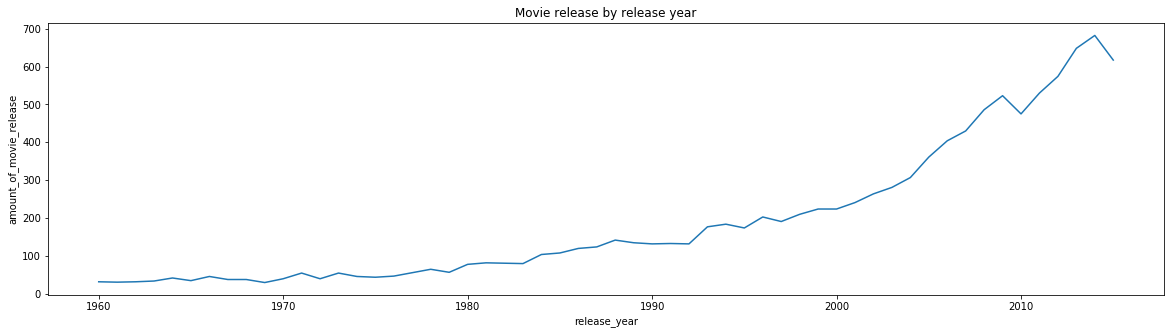

In [17]:
# 发行量折线图
movie_data.groupby('release_year')['original_title'].count().plot(kind='line', figsize=(20, 5));
plt.xlabel('release_year')
plt.ylabel('amount_of_movie_release')
plt.title('Movie release by release year');

>从1960年以来，电影发行量呈现上升趋势，并从1990年代开始呈现高速发展趋势。

### 散点图

>由于散点图的特点是观察数据的分布，在这里我们发现电影的播映时间具备分布特征，所以我们通过绘制散点图来找寻电影播映时间的统计学规律。首先我们可以通过describ（）函数先了解数据的统计分布，再通过散点图将其具象化。

In [18]:
# 绘制全部电影上映天数的散点图
# 查看电影上映时间的统计分布
movie_data['runtime'].describe()

count    10724.000000
mean       102.503450
std         30.460109
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

Text(0,0.5,'Indices')

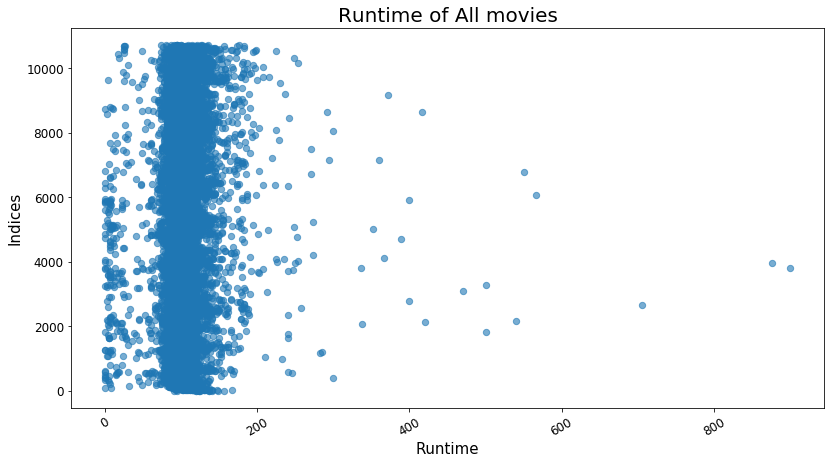

In [19]:
# 绘制散点图
plt.figure(figsize=(13.5,7))
plt.scatter(movie_data['runtime'], np.arange(10724), alpha=0.6, s=40)
plt.title('Runtime of All movies', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Indices', fontsize=15)

>图示中我们清晰的得到播映时间的具体分布，集中在100天左右。

<a id='conclusions'></a>
## 结论

> 局限性说明：

    数据的维度，以及所学知识的限制，使得分析的角度和深度都不足够全面，并不能挖掘出更有价值的内容。但分析本身是符合逻辑的，基于逻辑关系得出的结论是正确的。

> 数据使用说明：

    对数据的使用包含局部数据和全部数据，如果是局部数据，只代表了局部特征，不一定可以推及之整体特征，除非样本是随机的，局部规模足够大；在选取整体数据并提取其中的特定部分进行分析时，整体特征是具备概括性的，并且选取内容是可以说明探索问题的。

> 去除异常值的偏差说明：

    异常值的提出可能带走一部分有用的信息，如果数据量较大（10%）则可能对数据造成影响，在保证数据的可分析的基础上，我们允许一部分的误差存在。

> 收获：

      通过计算电影的利润，我们得到了一些最赚钱的电影，像阿凡达、星球大战和泰坦尼克号这些

      通过计算导演电影的平均受欢迎程度，我们找到了最好的导演Colin Trevorrow

      通过柱状图将收入最高大的10部电影呈现了出来

      通过折线图我们发现电影的利润和调整利润的波动一致性，但是两者的增长率是不一样的

      通过折线图我们了电影发行量的增长趋势

      通过散点图我们发现了所有电影播映时间集中在

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])